# Plotting Pandas DataFrames Subway Data

## Load the subway data

Let's load the data from the csv file

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crlf = "\n"
basepath = os.path.abspath('16_Pandas_groupby.py')
dname = os.path.dirname(basepath)
os.chdir(dname)

if os.environ['COMPUTERNAME'] == 'JDAZO':
    filepath = os.path.normpath(os.path.join(basepath,'..\\..\\..\\data\\' \
                                             'nyc_subway_weather.csv'))
    
elif os.environ['COMPUTERNAME'] == 'MELLOYELLO':
    filepath = os.path.normpath(os.path.join(basepath,'..\\..\\..\\data\\' \
                                             'nyc_subway_weather.csv'))

subway_df = pd.read_csv(filepath)

# verify data load
print(crlf)
print(subway_df[['UNIT','DATEn','ENTRIESn_hourly','longitude', 'latitude']].head())



   UNIT     DATEn  ENTRIESn_hourly  longitude   latitude
0  R003  05-01-11              0.0 -73.872564  40.689945
1  R003  05-01-11              0.0 -73.872564  40.689945
2  R003  05-01-11              0.0 -73.872564  40.689945
3  R003  05-01-11              0.0 -73.872564  40.689945
4  R003  05-01-11              0.0 -73.872564  40.689945


List the column names of the dataframe

In [2]:
column_names = []
for i in subway_df.columns:
    column_names.append(i)

print(crlf)
print(column_names)  



['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station', 'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain', 'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi', 'meanwspdi', 'weather_lat', 'weather_lon']


## Ridership By Location

### Group by Location

Create a subset of the subway data grouping by the latitude and longitude values.

In [3]:
data_by_location = subway_df.groupby(['latitude','longitude'], as_index=False).mean()
print(crlf)
data_by_location[['latitude','longitude']].head()

,latitude,longitude
0,40.576152,-73.975925
1,40.576298,-73.968523
2,40.577961,-73.961806
3,40.589547,-73.974295
4,40.590867,-73.797011


### Standardize the ridership data

Create a series of standardized hourly ridership based on the number of hourly entries for each location.

In [4]:
# standardized_hourly_entries = (data_by_location['ENTRIESn_hourly'] - data_by_location['ENTRIESn_hourly'].mean())/(data_by_location['ENTRIESn_hourly'].std())
standardized_hourly_entries = (data_by_location['ENTRIESn_hourly'] / 
                              data_by_location['ENTRIESn_hourly'].std())
print(crlf)
print(standardized_hourly_entries.head(n=5))



0    0.243095
1    0.317006
2    1.173833
3    0.292139
4    0.301374
Name: ENTRIESn_hourly, dtype: float64


### Plot the ridership data

Create a scatterplot of subway station locations using the latitude (x-axis) and longitude (y-axis). The mean ridership data is implemented as the marker size (bubble): the higher the ridership value, the larger the circumference of the circle marker.

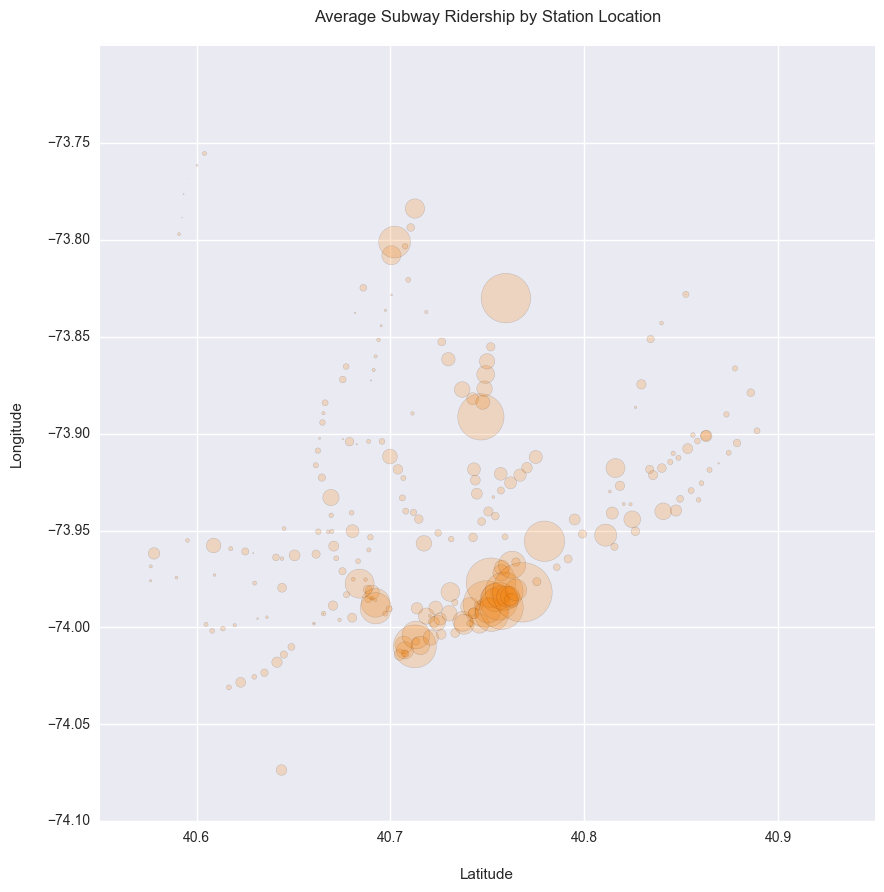

In [5]:
%matplotlib inline
import numpy as np


latitude_x = data_by_location['latitude'] 
longitude_y = data_by_location['longitude']
circle_area = np.pi * (4 * standardized_hourly_entries)**2
colors = np.random.rand(len(data_by_location))

plt.figure(figsize=(10,10))
plt.xlabel('\nLatitude')
plt.ylabel('Longitude\n')
plt.title('Average Subway Ridership by Station Location\n')
plt.scatter(latitude_x, longitude_y, c='#f57c00', s=circle_area, alpha=0.2)

print(crlf)

In [6]:
import numpy as np

# scaling = 100
latitude_x = data_by_location['latitude'] 
longitude_y = data_by_location['longitude']
circle_area = np.pi * (4 * standardized_hourly_entries)**2

# circle_area = standardized_hourly_entries.apply(np.absolute) * scaling
cols = standardized_hourly_entries
standardized_hourly_entries.head(10)



0    0.243095
1    0.317006
2    1.173833
3    0.292139
4    0.301374
5    0.070984
6    0.105489
7    0.390269
8    0.016299
9    0.187788
Name: ENTRIESn_hourly, dtype: float64

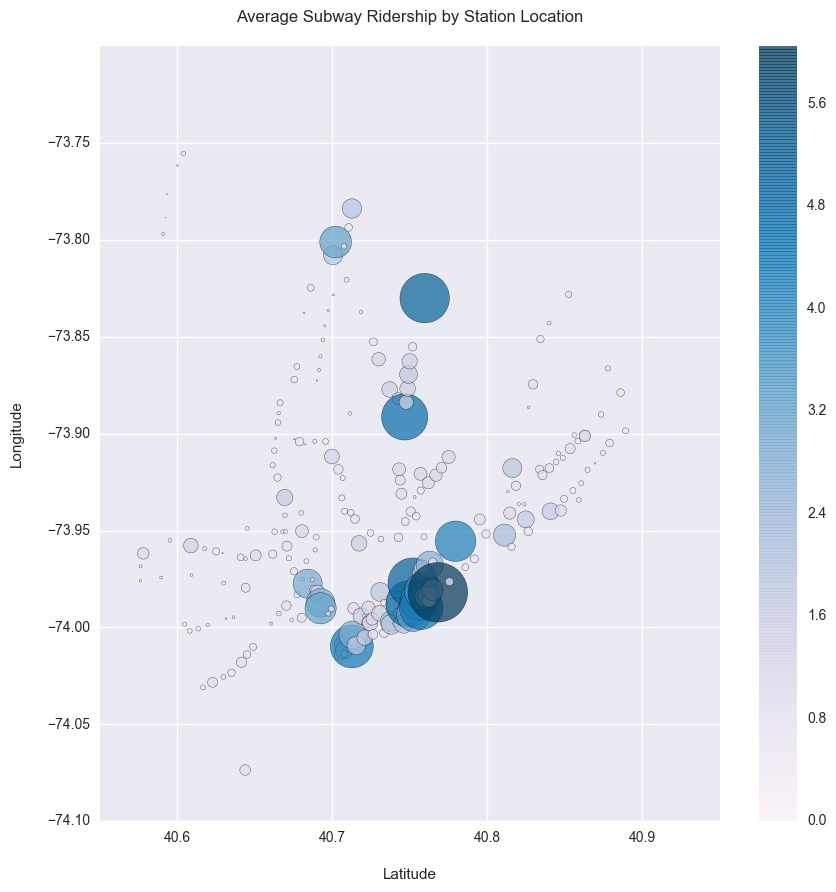

In [7]:
%matplotlib inline

# make plot bigger
plt.figure(figsize=(10,10))


# colors = np.random.rand(len(data_by_location))

plt.xlabel('\nLatitude')
plt.ylabel('Longitude\n')
plt.title('Average Subway Ridership by Station Location\n')
# plt.scatter(latitude_x, longitude_y, c='#f57c00', s=circle_area, alpha=0.2)
sc = plt.scatter(latitude_x, longitude_y, c=cols, s=circle_area, alpha=0.7, cmap='PuBu')
plt.colorbar(sc)
print(crlf)

# cmap reference:
# https://matplotlib.org/xkcd/examples/color/colormaps_reference.html

## Rain and Ridership

Let's take a look at how the subway dataset is structured again.

In [8]:
print(crlf)
print(subway_df[['UNIT','DATEn','rain','ENTRIESn']].head(n=5))



   UNIT     DATEn  rain  ENTRIESn
0  R003  05-01-11     0   4388333
1  R003  05-01-11     0   4388333
2  R003  05-01-11     0   4388333
3  R003  05-01-11     0   4388333
4  R003  05-01-11     0   4388333


In [9]:
def label_precipitation(row):
    if row['rain'] > 0 :
        return 1
    else :
        return 0

In [10]:
subway_df['rained'] = subway_df.apply(label_precipitation, axis=1)

In [11]:
entries_by_date = subway_df.groupby('DATEn', as_index=False)['ENTRIESn','rained'].mean()

In [12]:
rain_flag = entries_by_date['rained'] != 0
subway_df_rained = (entries_by_date.loc[rain_flag==True, 'ENTRIESn'])/1000000
subway_df_dry    = (entries_by_date.loc[rain_flag==False, 'ENTRIESn'])/1000000

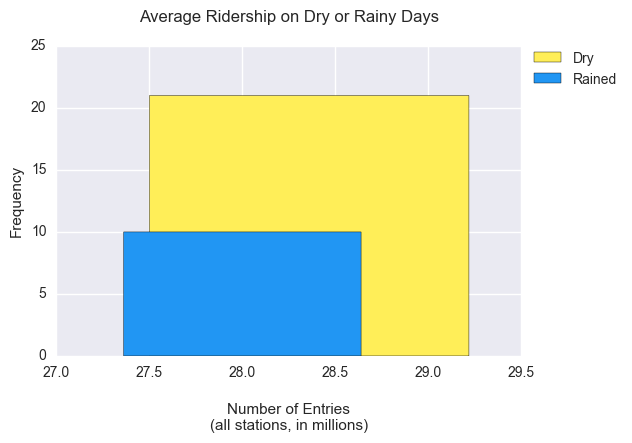

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

subway_df_dry.hist(bins=1, color='#ffee58')
subway_df_rained.hist(bins=1, color='#2196f3')
plt.legend(['Dry','Rained'], bbox_to_anchor=(1, 0.83),loc=3)
plt.title('Average Ridership on Dry or Rainy Days\n')
plt.xlabel('\nNumber of Entries\n(all stations, in millions)')
plt.ylabel('Frequency')

print(crlf)

## Precipitation and Ridership

### Ridership by location

Let's set aside a subset of the subway dataset grouping by location (represented by the `latitude` and `longitude` variables) and call the mean across all columns. We call this subset `data_by_location`.

Ridership is operationalized through the average hourly entries for each location. Precipitation is operationalized using the average precipitation values for each location.

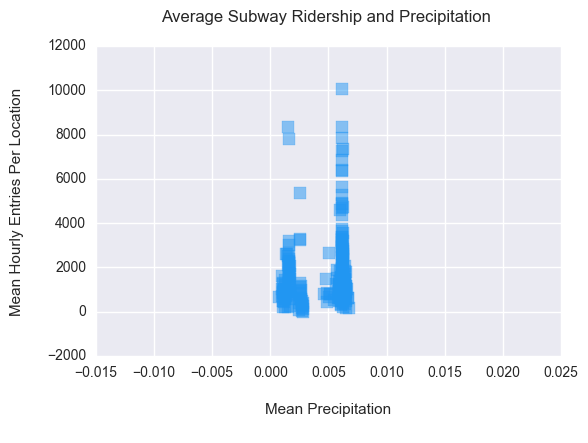

In [14]:
%matplotlib inline
import numpy as np

data_by_location = subway_df.groupby(['latitude','longitude'], as_index=False).mean()
precipi_x = data_by_location['precipi']
ridership_y = data_by_location['ENTRIESn_hourly']

plt.xlabel('\nMean Precipitation\n')
plt.ylabel('Mean Hourly Entries Per Location\n')
plt.title('Average Subway Ridership and Precipitation \n')
plt.scatter(precipi_x, ridership_y, c='#2196f3', alpha=0.5, s=70, marker="s", edgecolors='face')
print(crlf)

### Ridership by Station

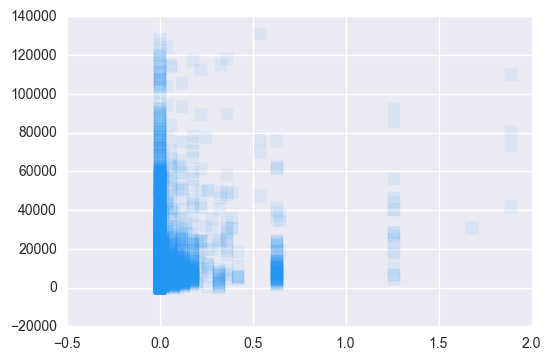

In [15]:
import numpy as np
station_date_df = subway_df.groupby(['DATEn','station'], as_index=False).sum()

precipi_x = station_date_df['precipi']
ridership_y = station_date_df['ENTRIESn_hourly']
plt.scatter(precipi_x, ridership_y, c='#2196f3', alpha=0.07, s=70, edgecolors='face', marker="s")
print(crlf)

Each marker represents each station's turnstile entries on a particular day in the month of May.

More markers are closely dispersed vertically on days were there is zero precipiation. Subway ridership is busy on days were there is little to no rain. The amount of entries on dry days is very, very high across may stations when the weather is dry. 

Subway ridership seems to go down as precipitation increases.

### Mean Temperature and Ridership


In [22]:
%matplotlib inline
import numpy as np

station_date_df = subway_df.groupby(['DATEn','station'], as_index=False)
station_entries_hourly = station_date_df[['ENTRIESn_hourly']].mean()
station_temperature_mean = station_date_df[['tempi']].mean()
scaled_entries = (station_entries_hourly[['ENTRIESn_hourly']] /
                  station_entries_hourly[['ENTRIESn_hourly']].std())

temperature_x = station_temperature_mean['tempi']
ridership_y   = station_entries_hourly['ENTRIESn_hourly']


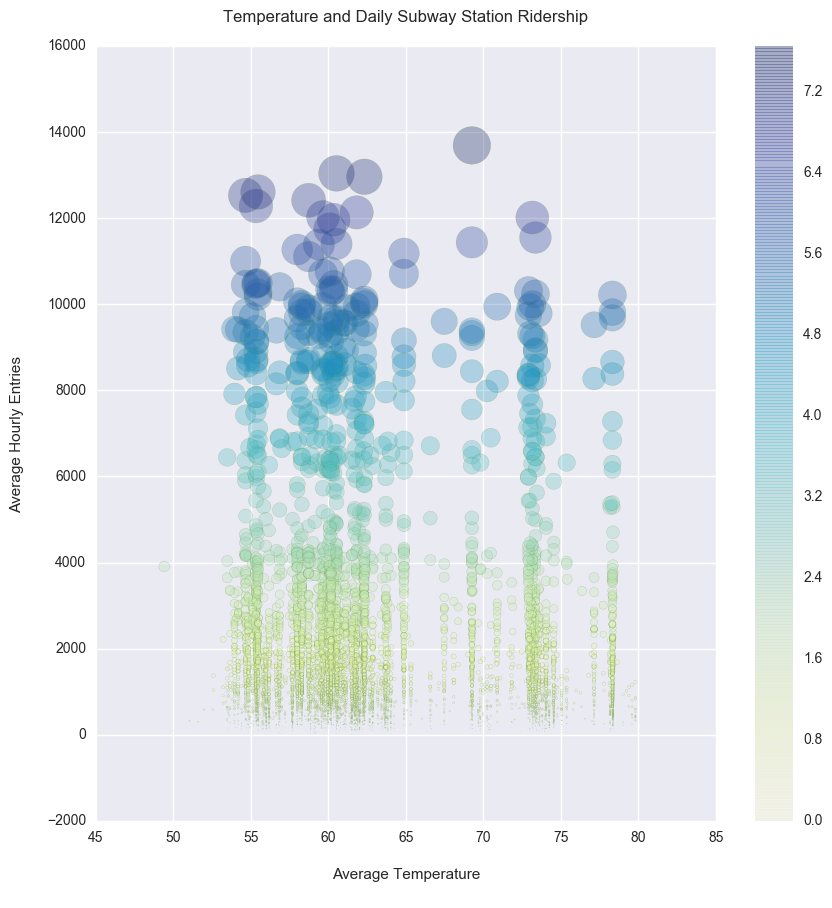

In [23]:
circle_area = np.pi * (2 * scaled_entries)**2
# colors = np.random.rand(len(data_by_location))
colors = scaled_entries

plt.figure(figsize=(10,10))
plt.xlabel('\nAverage Temperature\n')
plt.ylabel('Average Hourly Entries\n')
plt.title('Temperature and Daily Subway Station Ridership\n')
sc = plt.scatter(temperature_x, ridership_y, 
            # c='#8bc34a', 
            c=colors,
            alpha=0.3, 
            #s=50, 
            s=circle_area,
            edgecolors='#558b2f', 
            marker="o",
            cmap="YlGnBu")

plt.colorbar(sc)
print(crlf)

This plot shows how the average daily temperature is associated with the average hourly turnstile entries (ridership) for each New York City subway station for each day in the month of May, 2011.

The distribution is multimodal owing to the variation in ridership across all stations and locations.
It can also be associated with the decrease in ridership in certain non-working days. 

The majority of ridership activity falls in the temperature range of approximately 53 through 80 degrees Fahrenheit. There is an outlier with a station or stations registering ridership in under a 50 degree temperature.

The area of the circular markers ("bubbles") represent the comparative mean hourly entries for a station at a particular day in May. Although the number of ridership tend to show a somewhat uniform distribution overall across the average temperature range, it's interesting to notice that the bubbles tend to cluster on specific temperature ranges.  This behavior is observable in the temperature intervals starting from about 54 degrees Fahrenheit to about 65 degrees Fahrenheit. It then starts to cluster again at around the 73 to 76 degree range.

Looking at the plot from left to right, the density of ridership appears to become sparser and there's also a very gradual decline in ridership as the temperature rises. 











